##import libraries and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("covid_19_clean_complete.csv",parse_dates=['Date'])
df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe


##renaming columns

In [ ]:
df.rename(columns={'Date':'date',
                   'Province/State':'state',
                   'Country/Region':'country',
                   'Lat':'lat','Long':'long',
                   'Confirmed':'confirmed',
                   'Death':'death',
                   'Recovered':'recovered',
                   'Active':'active'}, inplace=True)

In [ ]:
df.head(2)

,state,country,lat,long,date,confirmed,Deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe


what are active cases

- 10 confired
- 3 recovered
- 1 died

- active? --> 6
- 10-3-1 = 6 active cases

In [ ]:
top=df[df['date']==df['date'].max()]


In [ ]:
world=top.groupby('country')[['confirmed','Deaths','active']].sum().reset_index()
world.head()

,country,confirmed,Deaths,active
0,Afghanistan,36263,1269,9796
1,Albania,4880,144,1991
2,Algeria,27973,1163,7973
3,Andorra,907,52,52
4,Angola,950,41,667


In [ ]:
figure= px.choropleth(world,locations='country',locationmode='country names', color='active', hover_name="country",
                      range_color=[1,1000],
                      color_continuous_scale='reds',
                      title='countries with active cases')
figure.show()

In [ ]:
total_cases=df.groupby('date')[['confirmed']].sum().reset_index()
total_cases.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


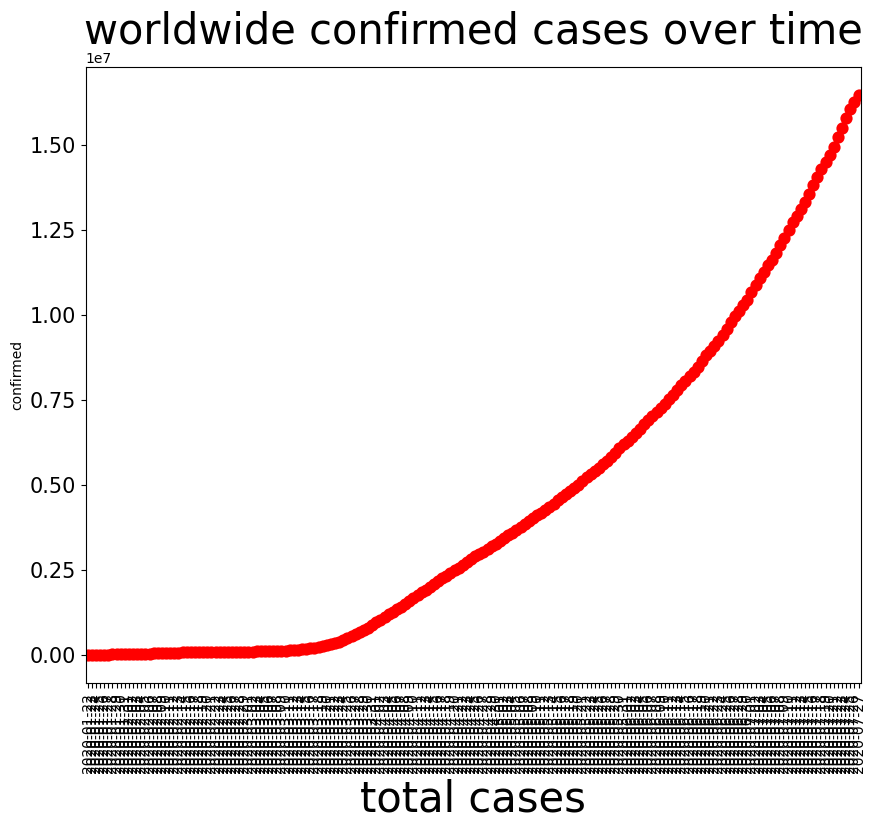

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('total cases',fontsize=30)
plt.title("worldwide confirmed cases over time",fontsize=30)

ax=sns.pointplot(x=total_cases.date,y=total_cases.confirmed,color='r')



In [ ]:
top_active=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()

In [ ]:
top_active

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


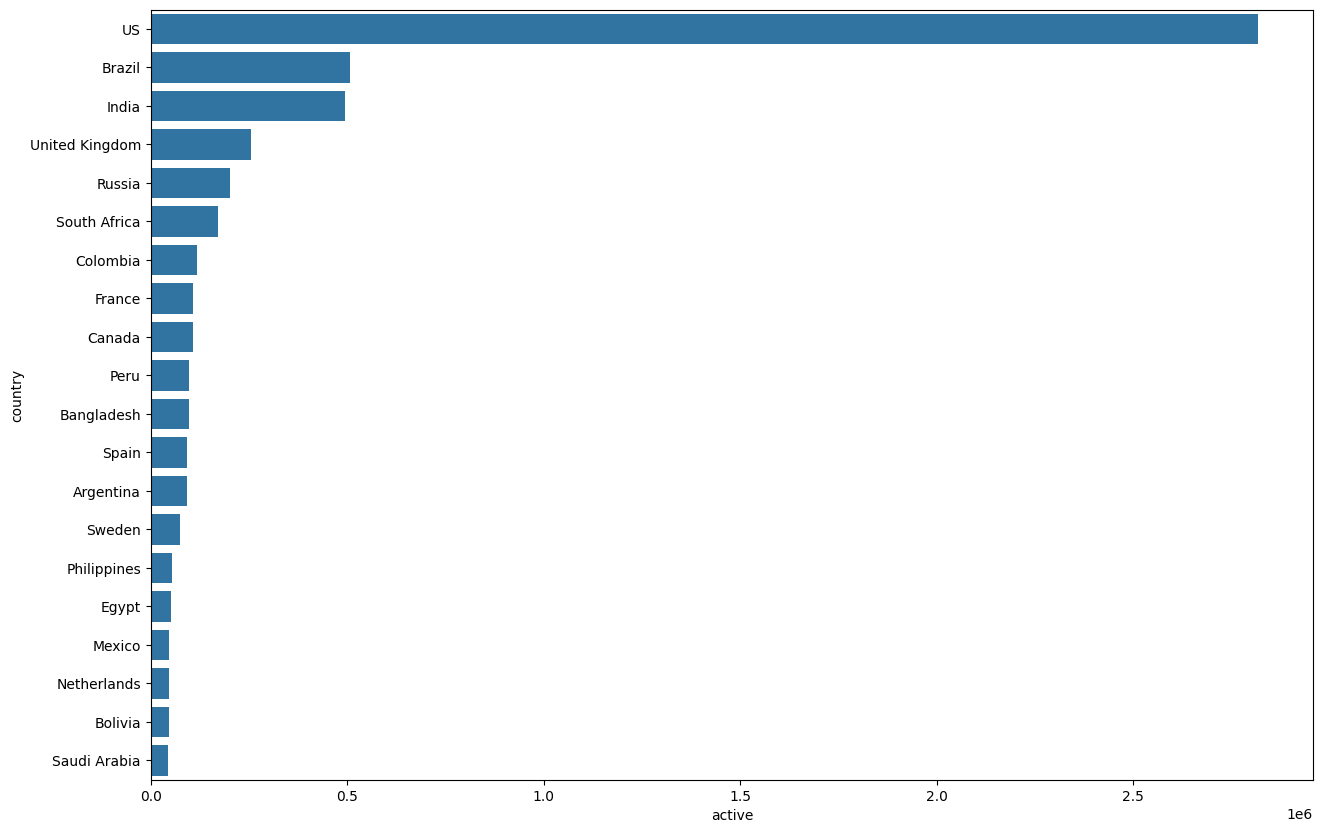

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=top_active.active,y=top_active.country)

In [ ]:
china=df[df.country=='China']
china=china.groupby(by='date')[['recovered','Deaths','confirmed','active']].sum().reset_index()
china.head()

,date,recovered,Deaths,confirmed,active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970


In [ ]:
us=df[df.country=='US']
us=us.groupby(by='date')[['recovered','Deaths','confirmed','active']].sum().reset_index()
us=us.iloc[33:].reset_index().drop("index",axis=1)
us.head()

,date,recovered,Deaths,confirmed,active
0,2020-02-24,5,0,15,10
1,2020-02-25,6,0,15,9
2,2020-02-26,6,0,15,9
3,2020-02-27,6,0,16,10
4,2020-02-28,7,0,16,9


In [ ]:
italy=df[df.country=='Italy']
italy=italy.groupby(by='date')[['recovered','Deaths','confirmed','active']].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop("index",axis=1)
italy.head()

,date,recovered,Deaths,confirmed,active
0,2020-01-31,0,0,2,2
1,2020-02-01,0,0,2,2
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,2,2
4,2020-02-04,0,0,2,2


In [ ]:
india=df[df.country=='India']
india=india.groupby(by='date')[['recovered','Deaths','confirmed','active']].sum().reset_index()
india=india.iloc[8:].reset_index().drop("index",axis=1)
india.head()

,date,recovered,Deaths,confirmed,active
0,2020-01-30,0,0,1,1
1,2020-01-31,0,0,1,1
2,2020-02-01,0,0,1,1
3,2020-02-02,0,0,2,2
4,2020-02-03,0,0,3,3


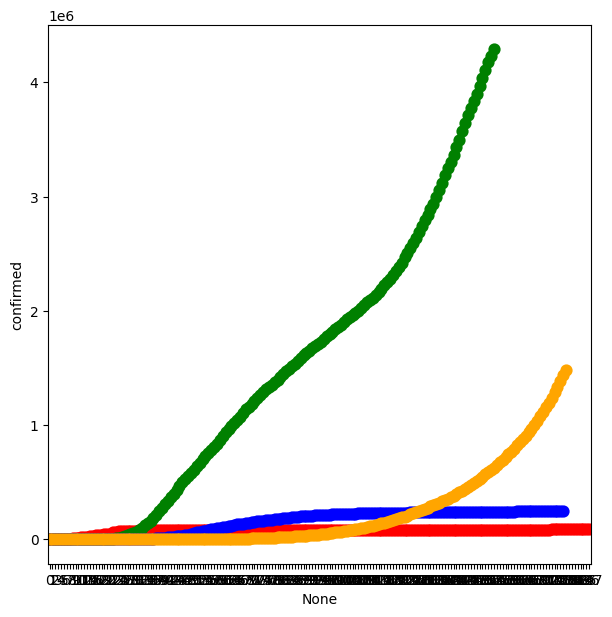

In [ ]:
plt.figure(figsize=(7,7))
sns.pointplot(x=china.index,y=china.confirmed,color='red')
sns.pointplot(x=us.index,y=us.confirmed,color='green')
sns.pointplot(x=italy.index,y=italy.confirmed,color='blue')
sns.pointplot(x=india.index,y=india.confirmed,color='orange')
plt.show()

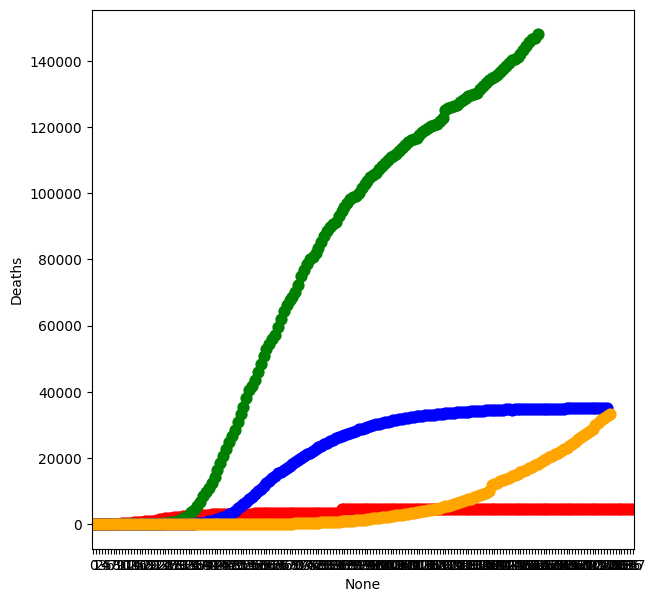

In [ ]:
plt.figure(figsize=(7,7))
sns.pointplot(x=china.index,y=china.Deaths,color='red')
sns.pointplot(x=us.index,y=us.Deaths,color='green')
sns.pointplot(x=italy.index,y=italy.Deaths,color='blue')
sns.pointplot(x=india.index,y=india.Deaths,color='orange')
plt.show()

In [ ]:
df_india=pd.read_excel("covid_19_india.xlsx")

In [ ]:
df_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [ ]:
df_india['total cases']=df_india['Total Confirmed cases (Indian National)']+df_india['Total Confirmed cases ( Foreign National )']

In [ ]:
df_india['total active']=df_india['total cases']-(df_india['Death']+df_india['Cured'])

In [ ]:
total_active=df_india['total active'].sum()
total_cases=df_india.groupby('Name of State / UT')['total active'].sum().sort_values(ascending=False).to_frame()


In [ ]:
total_cases.style.background_gradient(cmap='hot_r')

,total active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [ ]:
df_india.columns

Index(['S. No.', 'Name of State / UT',
       'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death',
       'total cases', 'total active'],
      dtype='object')

<Axes: xlabel='total cases', ylabel='Name of State / UT'>

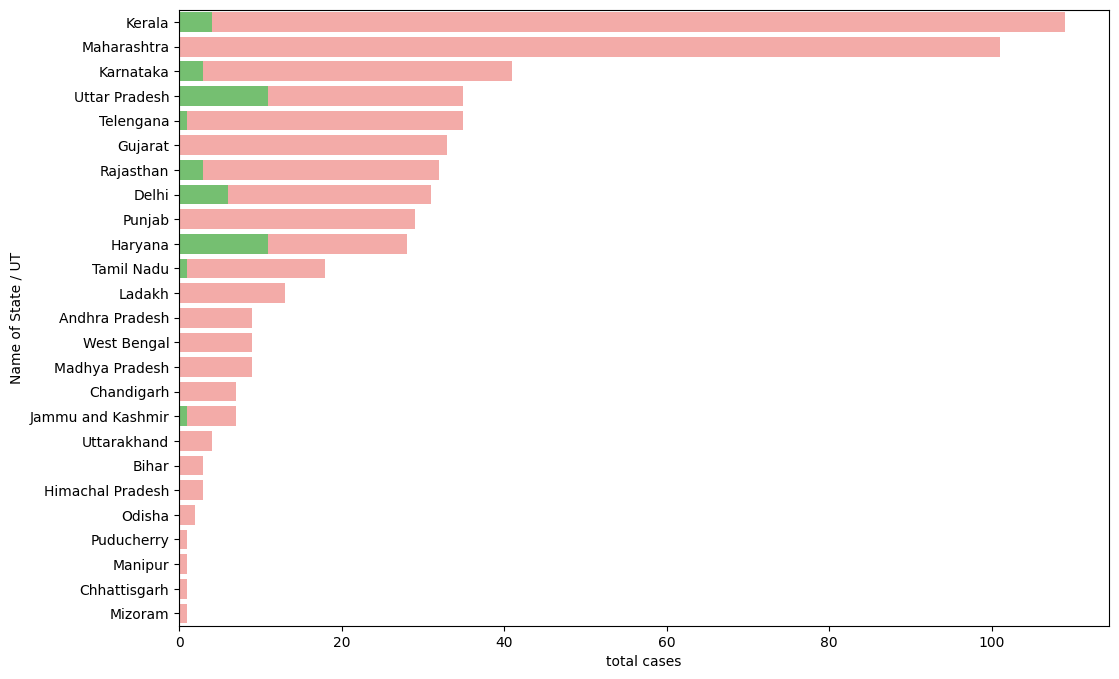

In [ ]:
f,ax=plt.subplots(figsize=(12,8))
data=df_india[['Name of State / UT','total cases','Cured','Death']]
data.sort_values('total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x='total cases',y='Name of State / UT',data=data,color='r')

sns.set_color_codes('muted')
sns.barplot(x='Cured',y='Name of State / UT',data=data,color='g')



In [ ]:
p_india=pd.read_excel('per_day_cases.xlsx',parse_dates=True)

In [ ]:
p_india.head(2)

,Date,Total Cases,New Cases,Active,Recovered,Deaths,Days after surpassing 100 cases
0,2020-01-30,1,1,1,0,0,NaN
1,2020-01-31,1,0,1,0,0,NaN


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=p_india['Date'],y=p_india['Total Cases'], mode='lines+markers',name='total cases'))
fig.update_layout(title_text='trend',plot_bgcolor='rgb(120,190,150)')
fig.show()


In [ ]:
fig=px.bar(p_india,x='Date',y='New Cases',barmode='group',height=400)
fig.update_layout(title_text='trend in daily basis',plot_bgcolor='rgb(230,230,230)')
fig.show()